# *Resident Evil 2 Remake* Action Words Analysis

As mentioned before, I chose to analyze the *Resident Evil 2* remake to provide some consistency with my groupmates. Going into this analysis, I originally expected the remake to do a better job than the original at ensuring female characters were progressing the story forward. However, when I discovered that female characters were already the ones progressing the story, I didn't know what to make of the remake. So, the visualizations ensued.

Male characters used 2094 verbs.
Female characters used 2586 verbs.


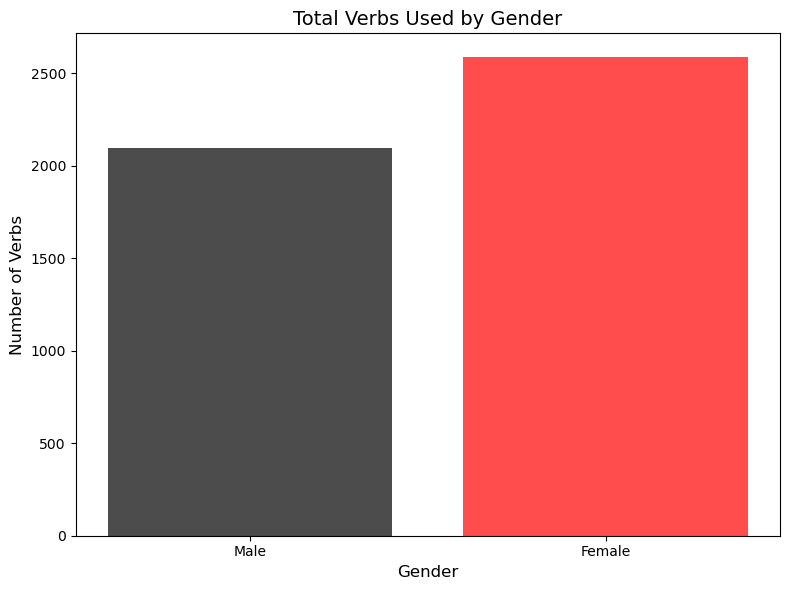

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = '/Users/kreestol/Downloads/RE2_Remake_Transcript.csv'
dialogue_df = pd.read_csv(csv_file_path)

# Load the text file with action words
txt_file_path = '/Users/kreestol/Downloads/action words (1).txt'
with open(txt_file_path, 'r') as file:
    action_words = file.read().split('.')
action_words = [word.strip().lower() for word in action_words if word.strip()]

# Function to match verbs in a line and categorize by gender
def match_verbs_and_categorize(dialogue_df, action_words):
    male_verb_count = 0
    female_verb_count = 0

    for _, row in dialogue_df.iterrows():
        line = str(row['Line']).lower()
        gender = str(row['Gender']).strip().lower()
        for verb in action_words:
            if verb in line:
                if gender == 'male':
                    male_verb_count += 1
                elif gender == 'female':
                    female_verb_count += 1

    return male_verb_count, female_verb_count

# Count the verbs spoken by male and female characters
male_verb_count, female_verb_count = match_verbs_and_categorize(dialogue_df, action_words)

# Print results
print(f"Male characters used {male_verb_count} verbs.")
print(f"Female characters used {female_verb_count} verbs.")

# Visualization
categories = ['Male', 'Female']
verb_counts = [male_verb_count, female_verb_count]
colors = ['black', 'red']  # Black for males, red for females

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, verb_counts, color=colors, alpha=0.7)  # Apply colors
plt.title('Total Verbs Used by Gender', fontsize=14)
plt.ylabel('Number of Verbs', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


Again, I had a lot of help with this code (thank you Chat GPT), but it is the same code as before, the only difference is the CSV file that the code compares to my Action Words txt file. Unsurprisingly, the remake did not do a 180 and make it so that male characters said more action words. They actually used about 200 more and the female characters' action word count dropped by about 200.

Caller: 0 action words (Male: 0, Female: 0)
Anchor: 0 action words (Male: 0, Female: 0)
Trucker: 0 action words (Male: 0, Female: 0)
Leon: 1198 action words (Male: 1198, Female: 0)
Officer: 0 action words (Male: 0, Female: 0)
Claire: 1268 action words (Male: 0, Female: 1268)
Loudspeaker: 0 action words (Male: 0, Female: 0)
Elliot: 0 action words (Male: 0, Female: 0)
Marvin: 296 action words (Male: 296, Female: 0)
Police Radio: 0 action words (Male: 0, Female: 0)
Ada: 660 action words (Male: 0, Female: 660)
Ben: 128 action words (Male: 128, Female: 0)
Annette: 376 action words (Male: 0, Female: 376)
Kendo: 70 action words (Male: 70, Female: 0)
Emma: 2 action words (Male: 0, Female: 2)
Kirkpatrick: 40 action words (Male: 40, Female: 0)
Umbrella Soldier 2: 0 action words (Male: 0, Female: 0)
System: 0 action words (Male: 0, Female: 0)
Umbrella Soldier 1: 0 action words (Male: 0, Female: 0)
Hunk: 112 action words (Male: 112, Female: 0)
William: 28 action words (Male: 28, Female: 0)
Policem

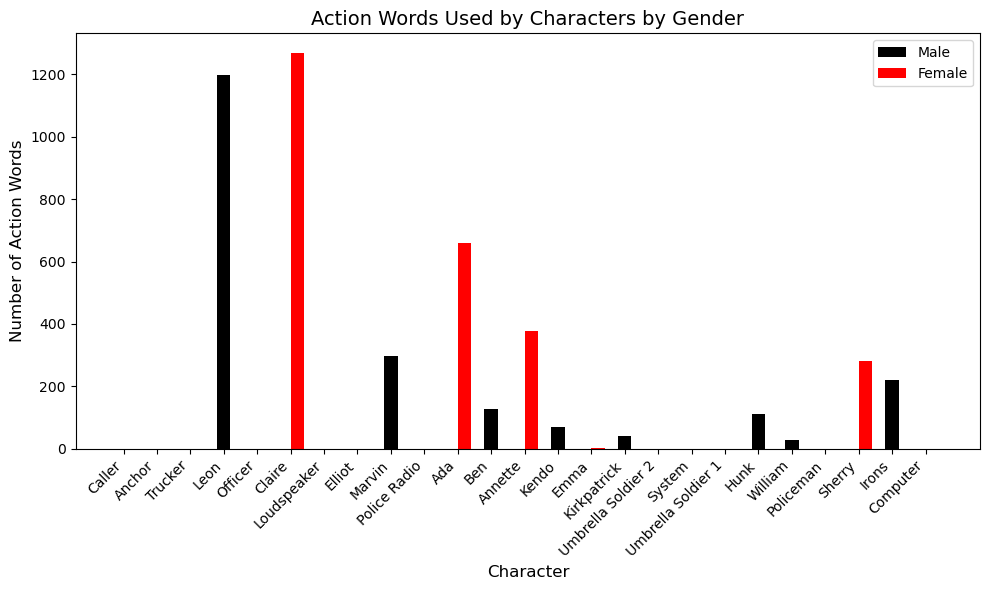

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = '/Users/kreestol/Downloads/RE2_Remake_Transcript.csv'
dialogue_df = pd.read_csv(csv_file_path)

# Load the text file with action words
txt_file_path = '/Users/kreestol/Downloads/action words (1).txt'
with open(txt_file_path, 'r') as file:
    action_words = file.read().split('.')
action_words = [word.strip().lower() for word in action_words if word.strip()]

# Function to count action words spoken by each character
def count_action_words_by_character(dialogue_df, action_words):
    character_counts = {}

    for _, row in dialogue_df.iterrows():
        line = str(row['Line']).lower()
        character = str(row['Character']).strip()
        gender = str(row['Gender']).strip().lower()

        # Initialize character in dictionary if not present
        if character not in character_counts:
            character_counts[character] = {'male': 0, 'female': 0}

        # Count action words in the line
        action_word_count = sum(1 for verb in action_words if verb in line)

        # Update the count based on gender
        if gender == 'male':
            character_counts[character]['male'] += action_word_count
        elif gender == 'female':
            character_counts[character]['female'] += action_word_count

    return character_counts

# Count action words spoken by each character
character_counts = count_action_words_by_character(dialogue_df, action_words)

# Display results
for character, counts in character_counts.items():
    total_action_words = counts['male'] + counts['female']
    print(f"{character}: {total_action_words} action words (Male: {counts['male']}, Female: {counts['female']})")

# Visualization: Total action words per character
characters = list(character_counts.keys())
male_counts = [counts['male'] for counts in character_counts.values()]
female_counts = [counts['female'] for counts in character_counts.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
x = range(len(characters))
plt.bar(x, male_counts, width=0.4, label='Male', color='black', align='center')
plt.bar(x, female_counts, width=0.4, label='Female', color='red', align='edge')
plt.xticks(x, characters, rotation=45, ha='right')
plt.title('Action Words Used by Characters by Gender', fontsize=14)
plt.ylabel('Number of Action Words', fontsize=12)
plt.xlabel('Character', fontsize=12)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In a closer investigation, I was able to find that Leon's word count did not increase as dramatically as I thought it would have considering the increase in the amount of male character action words. Instead, it increased only by about 60 action words. Claire's totaly amount went down by 10 action words. Ada's also went up by a little more than one hundred. instead, action words were increased for the males by characters like Hunk, William, and Marvin. This led me to believe that *Resident Evil* remakes do not necessarily have the purpose of perhaps making the game 'more with the times' if you will, but rather, they are likely remaking the game to provide updated graphics and further story consistency across the RE universe.